<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [4]:
# Making non-binary values binary
yes_no_mapping = {'yes': 1, 'no': 0}
furnishing_mapping = {'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0}
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_columns = ['furnishingstatus']
housing[yes_no_columns] = housing[yes_no_columns].applymap(yes_no_mapping.get)
housing[furnishing_columns] = housing[furnishing_columns].applymap(furnishing_mapping.get)

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [79]:
#X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y1 = housing['price'].values.reshape(-1,1)
#y1 = housing['price']

In [80]:
print("nan:", housing.isna().sum().sum())

nan: 0


In [81]:
from sklearn.model_selection import train_test_split
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)

X_train_tensor = torch.tensor(X1_train_scaled, dtype = torch.float32)
X_val_tensor = torch.tensor(X1_val_scaled, dtype = torch.float32)

In [83]:
y_train_tensor = torch.tensor(y1_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y1_val, dtype=torch.float32)

Problem 1a: 1 hidden layer

In [93]:
model = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [94]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.detach().item())
        val_losses.append(val_loss.detach().item())


        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return train_losses, val_losses

# Model
train_losses1, val_losses1 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 21097512697856.0000, Validation loss 19855424094208.0000
Epoch 200, Training loss 16912500129792.0000, Validation loss 15743152291840.0000
Epoch 300, Training loss 13708699893760.0000, Validation loss 12614403883008.0000
Epoch 400, Training loss 11243455774720.0000, Validation loss 10219799183360.0000
Epoch 500, Training loss 9338267631616.0000, Validation loss 8377485754368.0000
Epoch 600, Training loss 7860350615552.0000, Validation loss 6953556246528.0000
Epoch 700, Training loss 6710003499008.0000, Validation loss 5848360288256.0000
Epoch 800, Training loss 5811792773120.0000, Validation loss 4987144896512.0000
Epoch 900, Training loss 5108288454656.0000, Validation loss 4313446612992.0000
Epoch 1000, Training loss 4555533713408.0000, Validation loss 3784365309952.0000
Epoch 1100, Training loss 4119763615744.0000, Validation loss 3367159463936.0000
Epoch 1200, Training loss 3774

Problem 1b: 2 hidden layers

In [90]:
model1 = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

In [91]:
optimizer1 = optim.SGD(model1.parameters(), lr=0.0001)


train_losses2, val_losses2 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer1,  # Use the new optimizer
    model = model1,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 15425027964928.0000, Validation loss 14325830909952.0000
Epoch 200, Training loss 9610573381632.0000, Validation loss 8617492742144.0000
Epoch 300, Training loss 6642396561408.0000, Validation loss 5710727348224.0000
Epoch 400, Training loss 5127180124160.0000, Validation loss 4232020230144.0000
Epoch 500, Training loss 4353669464064.0000, Validation loss 3480821956608.0000
Epoch 600, Training loss 3958783082496.0000, Validation loss 3099943501824.0000
Epoch 700, Training loss 3757176258560.0000, Validation loss 2907350499328.0000
Epoch 800, Training loss 3654234931200.0000, Validation loss 2810334937088.0000
Epoch 900, Training loss 3601660641280.0000, Validation loss 2761726099456.0000
Epoch 1000, Training loss 3574797434880.0000, Validation loss 2737554587648.0000
Epoch 1100, Training loss 3561059778560.0000, Validation loss 2725662425088.0000
Epoch 1200, Training loss 3554021474

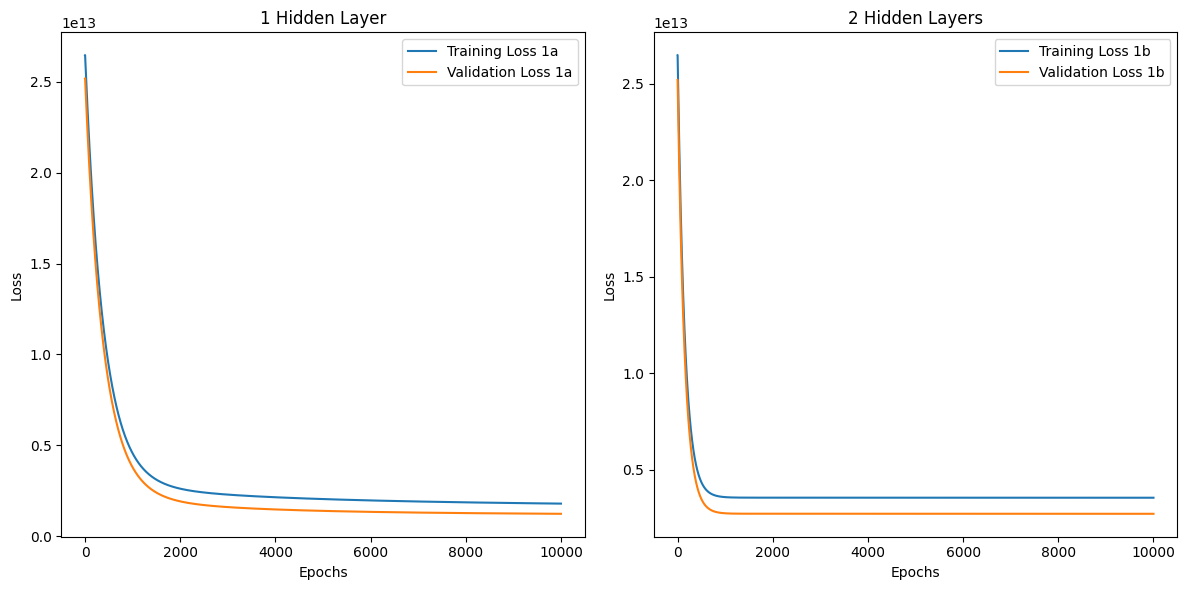

In [95]:
epochs = range(1, len(train_losses1) + 1)

plt.figure(figsize=(12, 6))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses1, label='Training Loss 1a')
plt.plot(epochs, val_losses1, label='Validation Loss 1a')
plt.title('1 Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation losses
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses2, label='Training Loss 1b')
plt.plot(epochs, val_losses2, label='Validation Loss 1b')
plt.title('2 Hidden Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()